In [1]:
import requests
from bs4 import BeautifulSoup
import jieba_setting, draw

In [2]:
def get_title(result): # return current_page_title_text
    current_page_title_text = ""  #當前頁面的標題字串
    for i in result.find_all("div", {"class":"r-ent"}):
        # 過濾標題會有被刪文後變成Nonetype的狀況
        title_name = i.find(class_="title").a
        if title_name is None:
            pass
        else:
            #print(title_name.text)
            title_name = title_name.text
            for i in range(len(title_name)):
                if title_name[i] == ']':
                    title_name = title_name[(i+1):]
                    break
            title_name = title_name.replace(" ", "")
            current_page_title_text += title_name

    return current_page_title_text

In [3]:
def get_data(): # return all_title_text
    #爬一次第一頁
    URL_HOME = "https://www.ptt.cc/bbs/C_Chat/index.html"
    HEADERS = {
    "user-agent": "Chrome/97.0.4692.71"
    }
    response = requests.get(url=URL_HOME, headers=HEADERS)
    result = BeautifulSoup(response.text, "html5lib")
    all_title_text = "" #所有標題爬完後的標題字串
    all_title_text += get_title(result=result)
    
    for page in range(175): 
        #print("第{}頁".format(page+2))
        btn = result.select("div.btn-group a")
        prevURL = btn[3]['href']
        URL_NOW = "https://www.ptt.cc" + prevURL
        response = requests.get(url=URL_NOW, headers=HEADERS)
        result = BeautifulSoup(response.text, "html5lib")
        all_title_text += get_title(result=result)

    return all_title_text

In [4]:
def clean_title_stopwords(word_list):  # return word_list
    # 手動去除stopword，因為jieba跟wordcloud都沒反應
    
    with open("./Data/stopwords.txt",'r', encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]  #會刪除尾隨的空格

    new_list=[]
    for seg in word_list:
        if seg not in stop_words:
            new_list.append(seg) 
    
    return new_list

In [5]:
if __name__ == "__main__":
    all_title_text = get_data()
    word_list = jieba_setting.setting(all_title_text)
    word_list = clean_title_stopwords(word_list)
    dict_text = jieba_setting.count_list(word_list)
    df_frequency = draw.show_frequency(dict_text)
    

Building prefix dict from o:\CChat_wordcloud_smallproject\Data\dict.txt.big ...
Loading model from cache C:\Users\GSX-40~1\AppData\Local\Temp\jieba.uf1f864e1f7d0db3db2b37a544852db6f.cache
Loading model cost 1.077 seconds.
Prefix dict has been built successfully.


In [6]:
    df_frequency

,單字,次數
270,果實,174
4,法環,115
178,遊戲,86
430,型態,80
568,海賊王,77
...,...,...
3130,以星,1
3127,益全,1
3126,邊緣,1
3125,倒閉,1


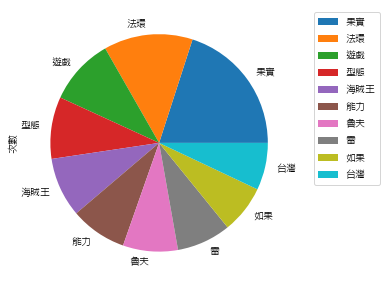

In [7]:
    draw.show_pie_plot(df_frequency)

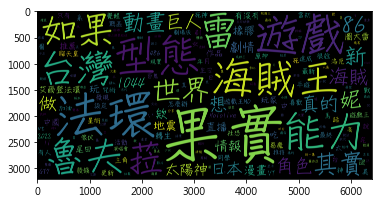

In [8]:
    draw.show_wordcloud(dict_text)